## Import Library and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
from deep_translator import GoogleTranslator

In [2]:
train = pd.read_csv('labeled.csv', sep=';')
test = pd.read_csv('unlabeled.csv', sep=';')
augmented_df = pd.read_csv('augmented.csv')

train

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


In [11]:
train['label'].value_counts()

Politik                    2972
Sosial Budaya               587
Pertahanan dan Keamanan     400
Ideologi                    400
Ekonomi                     367
Sumber Daya Alam            192
Demografi                    62
Geografi                     20
Name: label, dtype: int64

<AxesSubplot: >

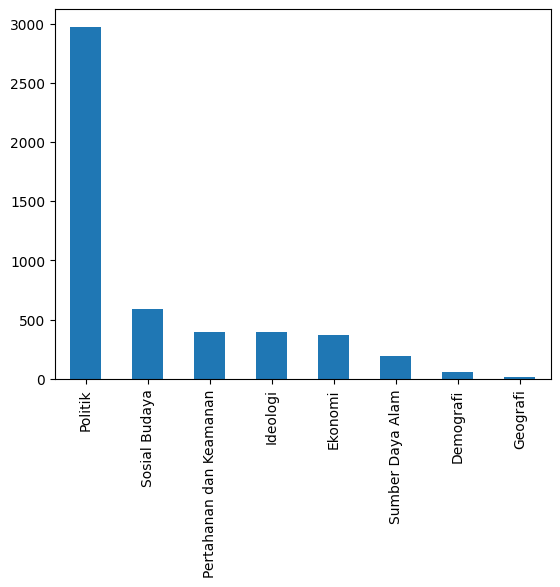

In [12]:
train['label'].value_counts().plot(kind='bar')

In [13]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
test.isnull().sum()

IDText    0
Text      0
dtype: int64

In [16]:
test.duplicated().sum()

0

In [3]:
train.duplicated().sum()

381

## Data Preprocessing

### Data Cleaning

In [4]:
train.drop_duplicates(inplace=True)

In [18]:
train['text'][3]

'RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7Q= Sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap engga sopan karena dianggap kurang menghormati orang tua, giliran skrg gibran yg tengil dan sok kritis malah dianggap kritis dan keras. Apakah ini tidak standar ganda? Ã°ÂŸÂ¤Â\xad [RE coldthem]'

In [5]:
def remove_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Expanded dictionary of abbreviations and their full forms
abbreviations_dict = {
    "skrg": "sekarang",
    "yg": "yang",
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "engga": "tidak",
    "tdk": "tidak",
    "krn": "karena",
    "dgn": "dengan",
    "bgmn": "bagaimana",
    "blm": "belum",
    "kpn": "kapan",
    "pdhl": "padahal",
    "dr": "dari",
    "utk": "untuk",
    "tp": "tapi",
    "kl": "kalau",
    "klo": "kalau",
    "dlm": "dalam",
    "sdh": "sudah",
    "udh": "sudah",
    "jd": "jadi",
    "trs": "terus",
    "tmn": "teman",
    "msh": "masih",
    "bkn": "bukan",
    "sm": "sama",
    "sbg": "sebagai",
    "bbrp": "beberapa",
    "ank": "anak",
    "org": "orang",
    "thn": "tahun",
    "mrk": "mereka",
    "sy": "saya",
    "gw": "saya",
    "aku": "saya",
    "u": "kamu",
    "anda": "kamu",
    "km": "kamu",
    "dl": "dulu",
    "lh": "lah",
    "jg": "juga",
    "mn": "mana",
    "pr": "pekerjaan rumah",
    "dtg": "datang",
    "blg": "bilang",
    "sb": "sebab",
    "kt": "kata",
    "kpd": "kepada",
    "tsb": "tersebut",
    "dsb": "dan sebagainya",
    "dll": "dan lain-lain",
    "M3nang": "menang",
    "m3nang": "menang",
    "tbh": "to be honest",
    "kudu": "harus",
    "bgt": "banget",
    "bngt": "banget",
    "bgtu": "begitu",
    "bgtt": "banget",
    "lgislatif": "legislatif",
    "ae": "saja",
    "bkn": "bukan",
    "bknnya": "bukannya",
    "bknnya": "bukannya",
    "ajh": "saja",
    "aj": "saja",
    "ajah": "saja",
    "mngmcam": "mengancam",
    "bhkn": "bahkan",
    "emng": "emang",
    "memang": "emang",
    "lu": "kamu",
    "lo": "kamu",
    "brani": "berani",
    "brni": "berani",
    "brrti": "berarti",
    "brarti": "berarti",
    
}

def preprocess_text(text):

    # Remove RT (retweet) from the beginning of the text
    text = re.sub(r'^RT', '', text)

    # Remove RT followed by a Twitter handle
    text = re.sub(r'RT\s@\S+', '', text)
    
    # Remove Twitter handles (handles not prefixed by RT)
    text = re.sub(r'@\S+', '', text)
    
    # Remove HMTL tags
    text = remove_tags(text)

    # Convert to lowercase
    text = text.lower()

    # remove Hashtags
    text = re.sub(r'#\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove content in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) 
    
    # Remove special characters and unnecessary symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # # Replace abbreviations based on the dictionary
    for abbr, full in abbreviations_dict.items():
        text = re.sub(r'\b' + abbr + r'\b', full, text)

    # Define Indonesian negative words
    negative_words = ['tidak', 'tak', 'bukan', 'belum', 'jangan', 'kurang']

    # Remove Stopwords (Indonesian)
    indonesian_stopwords = stopwords.words('indonesian')
    stopwords_without_negatives = [word for word in indonesian_stopwords if word not in negative_words]
    
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_without_negatives) + r')\b\s*')
    # text = pattern.sub('', text)
    
    return text


In [6]:
train['text'] = train['text'].apply(preprocess_text)
test['Text'] = test['Text'].apply(preprocess_text)
train

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,anies dapat tepuk tangan meriah saat jadi rekt...,Politik
2,emang bener sih pendukung ada yang goblok begi...,Demografi
3,sewaktu anies bersikap kritis ke kinerja pak p...,Politik
4,anies baswedan harap asn termasuk tni dan polr...,Politik
...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,Politik
4996,masyarakat yakin bahwa prabowo gibran memiliki...,Politik
4997,imo both are irrational but yang satu jauh leb...,Ekonomi
4998,look at that pak ganjar kamu sudah berkecimpun...,Pertahanan dan Keamanan


### Translate to the same language

In [7]:
# translate function to indonesia
def translate_to_indonesia(text):
    translated = GoogleTranslator(source='en', target='id').translate(text)
    return translated

In [23]:
test

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [28]:
test

,IDText,Text
0,TXT0001,kamu mau orang pro demokrasi di negara ini bis...
1,TXT0002,prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki daliyo ganjar pranowo itulah beliau sosok...
3,TXT0004,prabowo gibran yang bisa melakukan itu semua d...
4,TXT0005,lah justru yang gak nyambung junjungan elu aom...
...,...,...
995,TXT0996,bikin bangga deh ganjar mahfud mau alokasikan ...
996,TXT0997,pak jokowi sebelum pilpres berbesar hati meran...
997,TXT0998,sbaiknya si gemot nga usah ikutan debat deh ng...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


In [8]:
train['text'] = train['text'].apply(translate_to_indonesia)
train

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
test['Text'] = test['Text'].apply(translate_to_indonesia)
test

In [30]:
train['text'][4998]

'lihat pak ganjar kamu sudah berkecimpung di legislatif eksekutif bhkan capres saja mamatgs brani ancaman ancaman itu nyata pak ganjar nyalakan tanda bahaya untuk opm operasi senjata mamat'

### Encode label

In [31]:
train['label'].value_counts()

Politik                    2972
Sosial Budaya               425
Ideologi                    343
Pertahanan dan Keamanan     331
Ekonomi                     310
Sumber Daya Alam            157
Demografi                    61
Geografi                     20
Name: label, dtype: int64

In [32]:
train['label'] = train['label'].map({'Politik':0, 'Sosial Budaya':1, 'Pertahanan dan Keamanan':2, 'Ideologi':3, 'Ekonomi':4, 'Sumber Daya Alam':5, 'Demografi':6, 'Geografi': 7})
train

,text,label
0,kunjungan prabowo ini untuk meresmikan dan men...,5
1,Anies dapat bertepuk tangan meriah saat jadi r...,0
2,emang bener sih pendukung ada yang goblok begi...,6
3,sewaktu anies menyatakan kritis ke kinerja pak...,0
4,anies baswedan harap asn termasuk TNI dan Polr...,0
...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kekira...,0
4996,masyarakat yakin bahwa prabowo gibran memiliki...,0
4997,menurut saya keduanya tidak rasional tapi yang...,4
4998,lihat pak ganjar kamu sudah berkecimpung di le...,2


In [34]:
train['label'].value_counts()

0    2972
1     425
3     343
2     331
4     310
5     157
6      61
7      20
Name: label, dtype: int64

## Modelling

### Setup

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
# Load model directly
from transformers import AutoTokenizer, AutoModel

pipe = pipeline("feature-extraction", model="indobenchmark/indobert-large-p2")
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-large-p2")
model = AutoModel.from_pretrained("indobenchmark/indobert-large-p2")





In [ ]:
from transformers import AutoTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Tentukan apakah menggunakan GPU atau CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path ke direktori model
model_dir = "./BERT"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_dir)

# Definisikan class TextClassifier
class TextClassifier(nn.Module):
    def __init__(self, n_classes):
        super(TextClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(model_dir)
        self.drop = nn.Dropout(p=0.2)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        pooled_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        output = self.drop(pooled_output[1])
        return self.out(output)

# Inisialisasi model
model = TextClassifier(n_classes=8)  # Sesuaikan num_labels dengan jumlah kelas
model = model.to(device)

### Training

In [ ]:
class MyDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        review = str(self.texts[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }


In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = MyDataset(
        texts=df.text.to_numpy(),
        targets=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=2
    )

In [ ]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)


In [ ]:
EPOCHS = 3  # Sesuaikan jumlah epoch

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        model_to_save = model.module if hasattr(model, 'module') else model
        torch.save(model_to_save.state_dict(), "best_model_state.bin")
        best_accuracy = val_acc


In [ ]:
# Misal df_train dan df_val adalah DataFrame yang berisi data pelatihan dan validasi
train_data_loader = create_data_loader(df_train, tokenizer, max_len=128, batch_size=16)
val_data_loader = create_data_loader(df_val, tokenizer, max_len=128, batch_size=16)

# Menjalankan training loop
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        model_to_save = model.module if hasattr(model, 'module') else model
        torch.save(model_to_save.state_dict(), "best_model_state.bin")
        best_accuracy = val_acc


## Text Augmentation

In [27]:
temp_text = train['text'][3]

In [29]:
from googletrans import Translator
import re

# Inisialisasi Google Translator
translator = Translator()

# Penerjemahan Indonesia ke Inggris menggunakan Google Translate
def translate_id_to_en(text):
    translated = translator.translate(text, src='id', dest='en')
    return translated.text

# Penerjemahan Inggris ke Indonesia menggunakan Google Translate
def translate_en_to_id(text):
    translated = translator.translate(text, src='en', dest='id')
    return translated.text

# Fungsi untuk menghapus kata berulang
def remove_repeated_words(text):
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

# Fungsi untuk back translation
def back_translate(text):
    # Terjemahkan dari Indonesia ke Inggris
    en_text = translate_id_to_en(text)
    print(f"Terjemahan ke Inggris: {en_text}")
    
    # Terjemahkan kembali dari Inggris ke Indonesia
    id_text = translate_en_to_id(en_text)
    
    # Hapus kata berulang
    id_text_cleaned = remove_repeated_words(id_text)
    
    return id_text_cleaned

# Contoh penggunaan
input_text = temp_text
augmented_text = back_translate(input_text)

print("Teks Asli:", input_text)
print("Teks Augmentasi:", augmented_text)


Terjemahan ke Inggris: When Anies was critical of Pak Prabowo's performance, it was considered disrespectful because it was considered lack of respect for parents, the turn nowadays Gibran who was stretched and critical was considered critical and hard whether this was not double standard
Teks Asli: sewaktu anies bersikap kritis ke kinerja pak prabowo dianggap tidak sopan karena dianggap kurang menghormati orang tua giliran sekarang gibran yang tengil dan sok kritis malah dianggap kritis dan keras apakah ini tidak standar ganda
Teks Augmentasi: Ketika anies kritis terhadap kinerja Pak Prabowo, itu dianggap tidak sopan karena dianggap kurangnya rasa hormat terhadap orang tua, gilirannya saat ini Gibran yang diregangkan dan kritis dianggap kritis dan sulit apakah ini bukan standar ganda


In [30]:
from googletrans import Translator
from tqdm import tqdm

# Inisialisasi Google Translator
translator = Translator()

# Fungsi untuk back translation
def back_translate(text, src='id', intermediate_lang='en'):
    try:
        # Terjemahkan dari bahasa Indonesia ke bahasa Inggris
        translated = translator.translate(text, src=src, dest=intermediate_lang).text
        # Terjemahkan kembali dari bahasa Inggris ke bahasa Indonesia
        back_translated = translator.translate(translated, src=intermediate_lang, dest=src).text
        return back_translated
    except Exception as e:
        print(f"Error during translation: {e}")
        return text

# Fungsi untuk melakukan augmentasi
def augment_data(samples, target_count):
    augmented_samples = []
    while len(augmented_samples) + len(samples) < target_count:
        for sample in tqdm(samples, desc="Augmenting Samples", leave=False):
            augmented_text = back_translate(sample)
            augmented_samples.append(augmented_text)
            if len(augmented_samples) + len(samples) >= target_count:
                break
    return samples + augmented_samples

# Baca dataset
df = train.copy()

# Target jumlah sampel per kategori
target_counts = {
    0: 2972,  # Politik
    1: 800,   # Sosial Budaya
    2: 800,   # Pertahanan dan Keamanan
    3: 800,   # Ideologi
    4: 700,   # Ekonomi
    5: 600,   # Sumber Daya Alam
    6: 500,   # Demografi
    7: 400    # Geografi
}

# Dataframe baru untuk menyimpan hasil augmentasi
balanced_data = pd.DataFrame(columns=['text', 'label'])

# Lakukan augmentasi untuk setiap kelas sesuai target
for label in target_counts:
    category_data = df[df['label'] == label]
    samples = category_data['text'].tolist()
    target_count = target_counts[label]
    print(f"Augmenting label: {label} to reach {target_count} samples.")
    
    augmented_samples = augment_data(samples, target_count)
    
    # Buat dataframe untuk sampel yang diaugmentasi
    augmented_df = pd.DataFrame({'text': augmented_samples, 'label': [label]*len(augmented_samples)})
    
    # Gabungkan data yang diaugmentasi ke dataframe baru
    balanced_data = pd.concat([balanced_data, augmented_df], ignore_index=True)

# Tampilkan hasil augmentasi
for label in target_counts:
    print(f"Label: {label}, Number of samples: {len(balanced_data[balanced_data['label'] == label])}")

# Simpan dataset yang sudah diaugmentasi
# balanced_data.to_csv('augmented_dataset.csv', index=False)


Augmenting label: 0 to reach 2972 samples.
Augmenting label: 1 to reach 800 samples.


Augmenting Samples:   1%|          | 7/587 [00:11<12:25,  1.29s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  15%|█▌        | 89/587 [03:00<27:22,  3.30s/it]

Error during translation: _ssl.c:980: The handshake operation timed out


Augmenting Samples:  16%|█▌        | 95/587 [03:15<26:01,  3.17s/it]

Error during translation: The read operation timed out


Augmenting Samples:  19%|█▉        | 114/587 [03:50<13:46,  1.75s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  22%|██▏       | 128/587 [04:20<22:45,  2.98s/it]

Error during translation: The read operation timed out


Augmenting Samples:  26%|██▌       | 151/587 [05:13<22:48,  3.14s/it]

Error during translation: The read operation timed out


Augmenting label: 2 to reach 800 samples.


Augmenting Samples:  48%|████▊     | 191/400 [05:49<11:09,  3.20s/it]

Error during translation: _ssl.c:980: The handshake operation timed out


Augmenting Samples:  55%|█████▍    | 218/400 [06:45<09:10,  3.03s/it]

Error during translation: The read operation timed out


Augmenting label: 3 to reach 800 samples.


Augmenting Samples:  26%|██▌       | 102/400 [02:59<14:43,  2.97s/it]

Error during translation: The read operation timed out


Augmenting Samples:  42%|████▏     | 166/400 [05:14<10:58,  2.81s/it]

Error during translation: The read operation timed out


Augmenting Samples:  48%|████▊     | 190/400 [05:57<10:31,  3.01s/it]

Error during translation: The read operation timed out


Augmenting Samples:  74%|███████▍  | 297/400 [09:25<05:05,  2.97s/it]

Error during translation: The read operation timed out


Augmenting Samples:  89%|████████▉ | 355/400 [11:18<02:26,  3.26s/it]

Error during translation: The read operation timed out


Augmenting Samples:  98%|█████████▊| 394/400 [12:20<00:16,  2.74s/it]

Error during translation: The read operation timed out


Augmenting label: 4 to reach 700 samples.


Augmenting Samples:   3%|▎         | 11/367 [00:23<16:42,  2.82s/it]

Error during translation: The read operation timed out


Augmenting Samples:  23%|██▎       | 86/367 [03:00<14:04,  3.01s/it]

Error during translation: The read operation timed out


Augmenting Samples:  32%|███▏      | 116/367 [04:06<13:25,  3.21s/it]

Error during translation: The read operation timed out


Augmenting Samples:  60%|█████▉    | 219/367 [07:27<08:08,  3.30s/it]

Error during translation: The read operation timed out


Augmenting Samples:  67%|██████▋   | 246/367 [08:17<03:12,  1.59s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  87%|████████▋ | 320/367 [10:33<01:56,  2.48s/it]

Error during translation: The read operation timed out


Augmenting Samples:  90%|████████▉ | 330/367 [10:56<01:45,  2.85s/it]

Error during translation: The read operation timed out


Augmenting label: 5 to reach 600 samples.


Augmenting Samples:   6%|▌         | 11/192 [00:27<10:23,  3.45s/it]

Error during translation: The read operation timed out


Augmenting Samples:  33%|███▎      | 64/192 [02:15<04:01,  1.88s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  68%|██████▊   | 131/192 [04:29<02:47,  2.75s/it]

Error during translation: The read operation timed out


Augmenting Samples:  73%|███████▎  | 141/192 [04:51<02:21,  2.78s/it]

Error during translation: The read operation timed out


Augmenting Samples:  99%|█████████▉| 190/192 [06:37<00:06,  3.17s/it]

Error during translation: The read operation timed out


Augmenting Samples:  33%|███▎      | 63/192 [01:45<05:23,  2.51s/it] 

Error during translation: The read operation timed out


Augmenting Samples:  33%|███▎      | 64/192 [01:46<03:57,  1.86s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  47%|████▋     | 90/192 [02:25<04:43,  2.78s/it]

Error during translation: The read operation timed out


Augmenting Samples:  97%|█████████▋| 186/192 [04:30<00:15,  2.57s/it]

Error during translation: The read operation timed out


Augmenting label: 6 to reach 500 samples.


Augmenting Samples:  45%|████▌     | 28/62 [01:11<02:37,  4.64s/it]

Error during translation: The read operation timed out


Augmenting Samples:  55%|█████▍    | 34/62 [01:31<01:47,  3.85s/it]

Error during translation: The read operation timed out


Augmenting Samples:  52%|█████▏    | 32/62 [01:14<02:18,  4.60s/it]

Error during translation: The read operation timed out


Augmenting Samples:  73%|███████▎  | 45/62 [01:42<00:47,  2.77s/it]

Error during translation: _ssl.c:980: The handshake operation timed out


Augmenting Samples:  84%|████████▍ | 52/62 [01:55<00:26,  2.64s/it]

Error during translation: The read operation timed out


Augmenting Samples:  87%|████████▋ | 54/62 [02:05<00:32,  4.08s/it]

Error during translation: The read operation timed out


Augmenting Samples:  98%|█████████▊| 61/62 [02:18<00:02,  2.55s/it]

Error during translation: The read operation timed out


Augmenting Samples:  16%|█▌        | 10/62 [00:21<02:28,  2.85s/it]

Error during translation: The read operation timed out


Augmenting Samples:  60%|█████▉    | 37/62 [01:04<01:08,  2.74s/it]

Error during translation: The read operation timed out


Augmenting Samples:  84%|████████▍ | 52/62 [01:35<00:27,  2.75s/it]

Error during translation: The read operation timed out


Augmenting Samples:  94%|█████████▎| 58/62 [01:45<00:11,  2.80s/it]

Error during translation: The read operation timed out


Augmenting Samples:  15%|█▍        | 9/62 [00:13<02:06,  2.38s/it] 

Error during translation: The read operation timed out


Augmenting label: 7 to reach 400 samples.


Augmenting Samples:  40%|████      | 8/20 [00:15<00:22,  1.91s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:17<00:27,  2.33s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:13<00:17,  1.43s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:09<00:12,  1.01s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:06<00:08,  1.42it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:09<00:09,  1.25it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:12<00:15,  1.29s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:09<00:16,  1.39s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:11<00:14,  1.20s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  45%|████▌     | 9/20 [00:17<00:27,  2.47s/it]

Error during translation: The read operation timed out


Augmenting Samples:  30%|███       | 6/20 [00:11<00:41,  2.95s/it] 

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:13<00:22,  1.91s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:08<00:09,  1.27it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:08<00:11,  1.01it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  50%|█████     | 10/20 [00:13<00:21,  2.17s/it]

Error during translation: _ssl.c:980: The handshake operation timed out


Augmenting Samples:  70%|███████   | 14/20 [00:22<00:16,  2.74s/it]

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:06<00:09,  1.29it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:06<00:07,  1.69it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  40%|████      | 8/20 [00:12<00:13,  1.12s/it] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  65%|██████▌   | 13/20 [00:21<00:16,  2.30s/it]

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:06<00:07,  1.58it/s] 

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  10%|█         | 2/20 [00:07<01:13,  4.09s/it] 

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:15<00:17,  1.48s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  30%|███       | 6/20 [00:12<00:42,  3.00s/it] 

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:13<00:20,  1.69s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Augmenting Samples:  15%|█▌        | 3/20 [00:08<00:59,  3.48s/it] 

Error during translation: The read operation timed out


Augmenting Samples:  40%|████      | 8/20 [00:19<00:21,  1.77s/it]

Error during translation: the JSON object must be str, bytes or bytearray, not NoneType


Label: 0, Number of samples: 2972
Label: 1, Number of samples: 800
Label: 2, Number of samples: 800
Label: 3, Number of samples: 800
Label: 4, Number of samples: 700
Label: 5, Number of samples: 600
Label: 6, Number of samples: 500
Label: 7, Number of samples: 400


In [31]:
balanced_data

,text,label
0,anies dapat tepuk tangan meriah saat jadi rekt...,0
1,sewaktu anies bersikap kritis ke kinerja pak p...,0
2,anies baswedan harap asn termasuk tni dan polr...,0
3,duh jangan sampai pak lurah denger nih di acar...,0
4,anies ya allah sibukkanlah orang zalim agar da...,0
...,...,...
7567,Peta politik hanya melihat orang yang dulunya ...,7
7568,Reii Pak Ganjar dan Mr. Mahfud meninggalkan ga...,7
7569,oh ya sis Anda dapat memeriksa pul,7
7570,Desa saya di AeAnge dekat Bukit Tinggi Kamoung...,7


In [33]:
balanced_data['label'].value_counts()

0    2972
1     800
2     800
3     800
4     700
5     600
6     500
7     400
Name: label, dtype: int64

<AxesSubplot: >

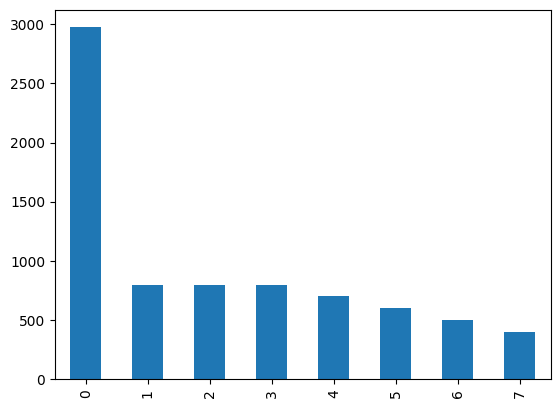

In [34]:
balanced_data['label'].value_counts().plot(kind='bar')

In [35]:
train['text'].value_counts().plot(kind='bar')

<AxesSubplot: >

Error in callback <function _draw_all_if_interactive at 0x000001FB74E69E10> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001FB0E8A75B0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [32]:
balanced_data.to_csv('augmented.csv', index=False)

In [36]:
balanced_data

,text,label
0,anies dapat tepuk tangan meriah saat jadi rekt...,0
1,sewaktu anies bersikap kritis ke kinerja pak p...,0
2,anies baswedan harap asn termasuk tni dan polr...,0
3,duh jangan sampai pak lurah denger nih di acar...,0
4,anies ya allah sibukkanlah orang zalim agar da...,0
...,...,...
7567,Peta politik hanya melihat orang yang dulunya ...,7
7568,Reii Pak Ganjar dan Mr. Mahfud meninggalkan ga...,7
7569,oh ya sis Anda dapat memeriksa pul,7
7570,Desa saya di AeAnge dekat Bukit Tinggi Kamoung...,7


In [37]:
balanced_data['text'] = balanced_data['text'].apply(preprocess_text)
balanced_data

,text,label
0,anies dapat tepuk tangan meriah saat jadi rekt...,0
1,sewaktu anies bersikap kritis ke kinerja pak p...,0
2,anies baswedan harap asn termasuk tni dan polr...,0
3,duh jangan sampai pak lurah denger nih di acar...,0
4,anies ya allah sibukkanlah orang zalim agar da...,0
...,...,...
7567,peta politik hanya melihat orang yang dulunya ...,7
7568,reii pak ganjar dan mr mahfud meninggalkan gag...,7
7569,oh ya sis kamu dapat memeriksa pul,7
7570,desa saya di aeange dekat bukit tinggi kamoung...,7


## Temp

In [3]:
augmented_df.duplicated().sum()

2044

In [4]:
train.duplicated().sum()

381

In [6]:
train[train.duplicated()]

,text,label
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
104,"RT Anak Muda Indonesia, the future of this nat...",Ideologi
145,"RT Pupuk bersubsidi langka, Tim Prabowo Gibran...",Ekonomi
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
...,...,...
4917,"RT Ini kejam, warga disitu sudah bersedia diba...",Sosial Budaya
4933,RT Karena program pak anies yg ini. Bapak gw j...,Sumber Daya Alam
4955,RT Ekonom: Program Makan Siang dan Susu Gratis...,Ekonomi
4971,"RT menjelang tengah malam ini, aku mau ucapkan...",Ideologi


In [7]:
train['text'][146]

'RT Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup.. #AMINAjaDulu https://t.co/txIvBhLvn2 [RE ekowboy2]'

In [8]:
train['text'][189]

'RT Abah Anies ingin mengangkat martabat petani agar tidak terus menerus menerima bansos karena penghasilannya cukup.. #AMINAjaDulu https://t.co/txIvBhLvn2 [RE ekowboy2]'

In [9]:
train.isna().sum()

text     0
label    0
dtype: int64

In [10]:
augmented_df.isna().sum()

text     33
label     0
dtype: int64